In [1]:
%pylab qt
%matplotlib inline
import fitting
import pandas
import random as rd

def noise(n, scale=1):
    data = []
    for i in range(n):
        number = scale * (rd.triangular()-0.5)*2
        data.append(number)
    return np.array(data)

Populating the interactive namespace from numpy and matplotlib


[[618.1199999999999, 739.2349926367068], [739.2349926367068, 894.8503204491227]]
[[51, 23.991251675341854], [23.991251675341854, 34.74881964231272]]
[1.0030739294054545, 0.9962113830743509, 1.0019611741935026]
[1.0030739294054545, 0.9962113830743509, 1.0019611741935026]
[[618.1199999999999, 739.2349926367068], [739.2349926367068, 894.8503204491227]]
[[51, 23.991251675341854], [23.991251675341854, 34.74881964231272]]
[1.0030739294054545, 0.9962113830743509, 1.0019611741935026]
##### Fit results #####
FIT FUNCTION: exponential_offset
RAW
        params_key      : ['scale', 'alpha', 'offset']
        optimised params: [0.99945294 0.99897469 1.00057739]
        uncertainties   : [0.00421102 0.00463093 0.00231757]
        chi2r           : 0.22501545225699063
        r2              : 0.9999536183010614
READABLE
        scale      = (9.99 +/- 0.04) * 1e-1
        alpha      = (9.99 +/- 0.05) * 1e-1
        offset     = (1.001 +/- 0.002) * 1e0
#######################


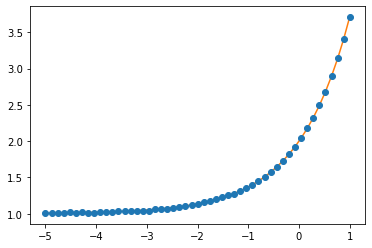

In [2]:
#Create false data and plot them
noise_scale = .01
params = [1, 1, 1]
x  = np.linspace(-5, 1, 51)
uy = np.ones(len(x)) * noise_scale
y  = params[1]*np.exp(params[0]*x) + noise(len(x), noise_scale) + params[2]
plt.errorbar(x, y, yerr=uy, fmt="o")

#Calculate best params for linear fit and plot fit curve
fitter = fitting.Fit("exponential_offset", x=x, y=y, uy=uy)

print(fitter._guessfunction(fitter))
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)
yfit = fitter.func(x, *fit_params)
plt.plot(x, yfit)

# Linear

##### Fit results #####
FIT FUNCTION: linear
RAW
        params_key      : ['slope', 'y0']
        optimised params: [ 3.14658879 50.13734426]
        uncertainties   : [0.09033001 0.52966001]
        chi2r           : 0.7087164968997367
        r2              : 0.9888190515513754
READABLE
        slope      = (3.15 +/- 0.09) * 1e0
        y0         = (5.01 +/- 0.05) * 1e1
#######################


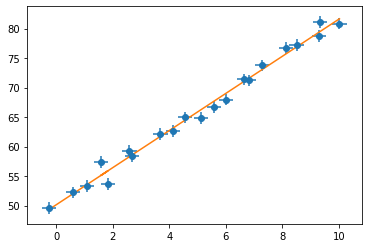

In [7]:
#Create false data and plot them
x  = np.linspace(0, 10, 21)
y  = np.pi*x+50 + noise(len(x), 2)
x += noise(len(x), 0.5) 
ux = np.ones(len(x))*0.25
uy = np.ones(len(x))*1

plt.errorbar(x, y, xerr=ux, yerr=uy, fmt="o")

#Calculate best params for linear fit and plot fit curve
fitter = fitting.Fit("linear", x=x, y=y, uy=uy, ux=ux)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)
yfit = fitter.func(x, *fit_params)
plt.plot(x, yfit)

##### Fit results #####
FIT FUNCTION: linear
RAW
        params_key      : ['slope', 'y0']
        optimised params: [ 3.14658879 50.13734426]
        uncertainties   : [0.09033001 0.52966001]
        chi2r           : 0.7087164968997367
        r2              : 0.9888190515513754
READABLE
        slope      = (3.15 +/- 0.09) * 1e0
        y0         = (5.01 +/- 0.05) * 1e1
#######################


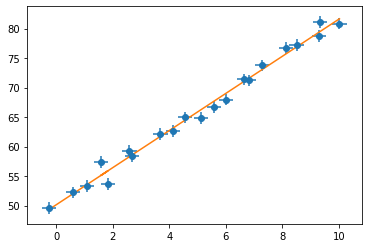

In [8]:
#Also works with pandas.series

data = pandas.Series(y, index=x)
plt.errorbar(x, y, xerr=ux, yerr=uy, fmt="o")

#Calculate best params for linear fit and plot fit curve
fitter = fitting.Fit("linear", data=data, uy=uy, ux=ux)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=True)
yfit = fitter.func(x, *fit_params)
plt.plot(x, yfit)

# Functions available

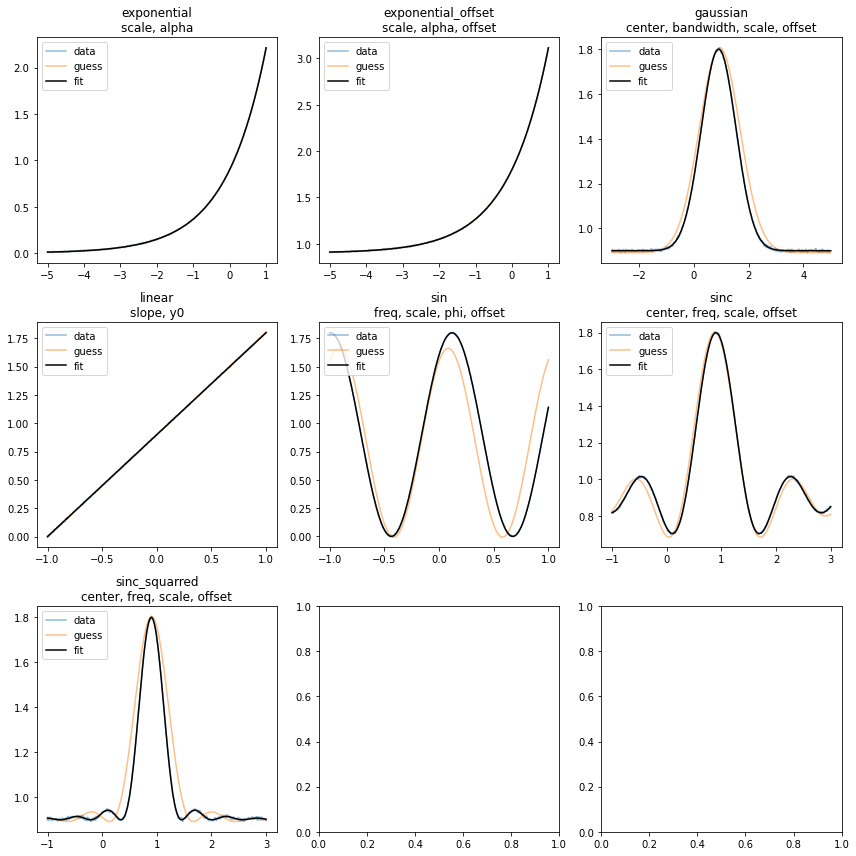

In [2]:
fig = plt.figure(figsize=(12,12))
sps = (3,3)
axes = []
for i in range(sps[0]*sps[1]):
    nrow = i//sps[0]
    ncol = i%sps[1]
    axes.append(plt.subplot2grid(sps, (nrow,ncol)))

funcs = ["exponential", "exponential_offset", "gaussian", "linear", "sin", "sinc", "sinc_squarred"]
while len(funcs) < len(axes):
    funcs.append(None)

for ax, func in zip(axes, funcs):
    if func is not None:
        if "exponential" in func:
            xmin, xmax = -5, 1
        elif "sinc" in func:
            xmin, xmax = -1, 3
        elif "gaussian" in func:
            xmin, xmax = -3, 5
        else:
            xmin, xmax = -1, 1
        x     = np.linspace(xmin, xmax, 501)
        xfit  = x
        y     = np.zeros(len(x))
        noisy = noise(len(x), 0.01)
        uy = noisy
        fitter = fitting.Fit(func, x=x, y=y, uy=uy)
        params = np.ones(fitter.number_of_fitparams)*.9
        y = fitter.func(x, *params) + noisy
        ax.plot(x, y, "-C0", alpha=0.5, label="data")
        fitter = fitting.Fit(func, x=x, y=y, uy=uy)
        y_guess = fitter.func(x, *fitter.guess_params())
        ax.plot(x, y_guess, "-C1", alpha=0.5, label="guess")
        fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)
        yfit = fitter.func(xfit, *fit_params)
        ax.plot(xfit, yfit, "-k", label="fit")
        subtitle = ""
        for key in fitter.params_key:
            subtitle += key+", "
        ax.set_title(func+"\n"+subtitle[:-2])
        ax.legend(loc="upper left", prop={"size":10})
plt.tight_layout()

In [15]:
[0,1][:1]

[0]